In [1]:
options(warn=-1)
library(caret)
library(datasets)
library(mlbench)
library(ggplot2)

library(pROC)
library(ROCR)

Loading required package: lattice
Loading required package: ggplot2
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [29]:
install.packages('ROCR')

Installing package into 'C:/Users/a57240303/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\a57240303\AppData\Local\Temp\RtmpO4HXuk\downloaded_packages


In [2]:
df <- read.csv(file="E:\\1.DATA_ANALYTICS\\17-Analise Preditiva Avançada\\Exercicio_2\\BostonCredit_Exercise.csv", header=TRUE, sep=",")

In [3]:
head(df)

GENDER,AGE,DEBT,MARRIED,BANK_CUSTOMER,EDUCATION_LEVEL,YEARS_EMPLOYED,PRIOR_DEFAULT,EMPLOYED,CITIZEN,INCOME,APPROVED
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<dbl>,<int>,<int>,<fct>,<int>,<fct>
1,30.83,0.000,0,1,w,1.25,1,1,1,0,Yes
0,58.67,4.460,0,1,q,3.04,1,1,1,560,Yes
0,24.50,0.500,0,1,q,1.50,1,0,1,824,Yes
1,27.83,1.540,0,1,w,3.75,1,1,1,3,Yes
1,20.17,5.625,0,1,w,1.71,1,0,0,0,Yes
1,32.08,4.000,0,1,m,2.50,1,0,1,0,Yes


In [4]:
set.seed(314)
trainIndex <- createDataPartition(df$APPROVED, p = .7, list = FALSE)
df$APPROVED <- as.factor(df$APPROVED)

In [5]:
dfTrain <- df[ trainIndex,]
dfTest  <- df[-trainIndex,]

In [6]:
set.seed(314)
options(warn=-1)
cv <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE,
                  summaryFunction=twoClassSummary, classProbs = TRUE)


model <- train(APPROVED~., data = dfTrain, method = "glm", 
                   metric="ROC",trControl = cv, control = list(maxit = 50))

In [7]:
model

Generalized Linear Model 

340 samples
 11 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 307, 306, 306, 306, 306, 306, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9362649  0.8349673  0.8904412


In [8]:
dfPred <- predict(model, newdata=dfTest)

In [9]:
confusionMatrix(data=dfPred, dfTest$APPROVED)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  64   9
       Yes 10  61
                                          
               Accuracy : 0.8681          
                 95% CI : (0.8016, 0.9187)
    No Information Rate : 0.5139          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.736           
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8649          
            Specificity : 0.8714          
         Pos Pred Value : 0.8767          
         Neg Pred Value : 0.8592          
             Prevalence : 0.5139          
         Detection Rate : 0.4444          
   Detection Prevalence : 0.5069          
      Balanced Accuracy : 0.8681          
                                          
       'Positive' Class : No              
                                          

In [10]:
dfProbs <- predict(model, newdata=dfTest, type="prob")
head(dfProbs)

,No,Yes
,<dbl>,<dbl>
1,9.818385e-02,0.9018162
2,3.708141e-02,0.9629186
5,5.224679e-01,0.4775321
7,8.183419e-09,1.0000000
12,8.370088e-02,0.9162991
16,4.264399e-01,0.5735601


Area under the curve: 0.8992

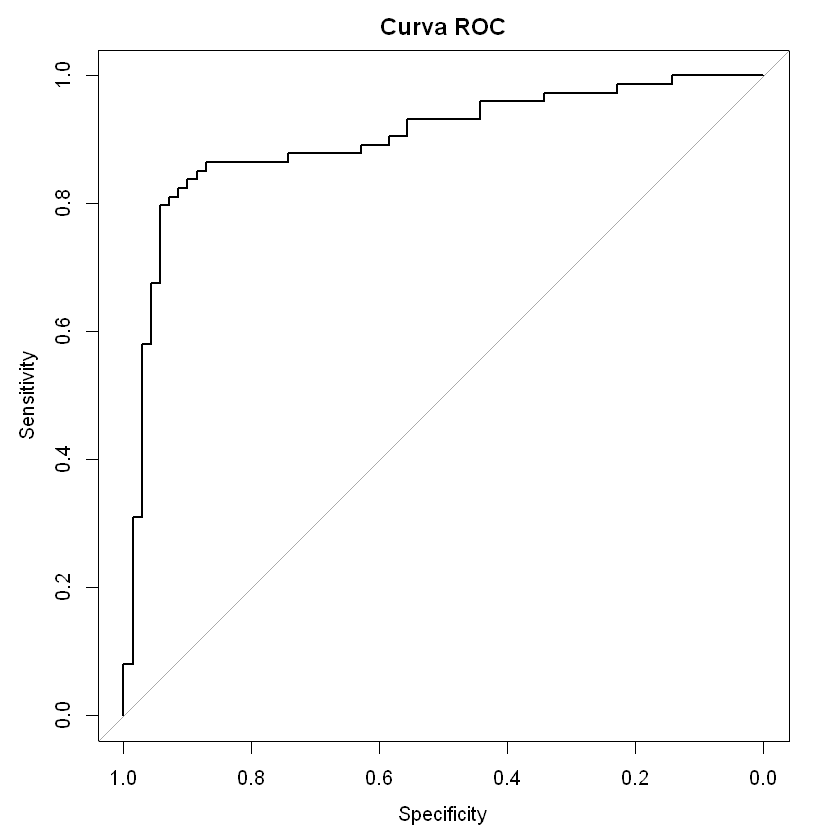

In [11]:
gbm.ROC <- roc(predictor=dfProbs$Yes,
               response=dfTest$APPROVED,
               levels=rev(levels(dfTest$APPROVED)))

gbm.ROC$auc
plot(gbm.ROC,main="Curva ROC")

ROC curve variable importance

                Importance
PRIOR_DEFAULT       0.8870
YEARS_EMPLOYED      0.7448
EMPLOYED            0.7313
INCOME              0.6744
DEBT                0.6273
AGE                 0.6164
BANK_CUSTOMER       0.5642
MARRIED             0.5642
CITIZEN             0.5510
EDUCATION_LEVEL     0.5502
GENDER              0.5266

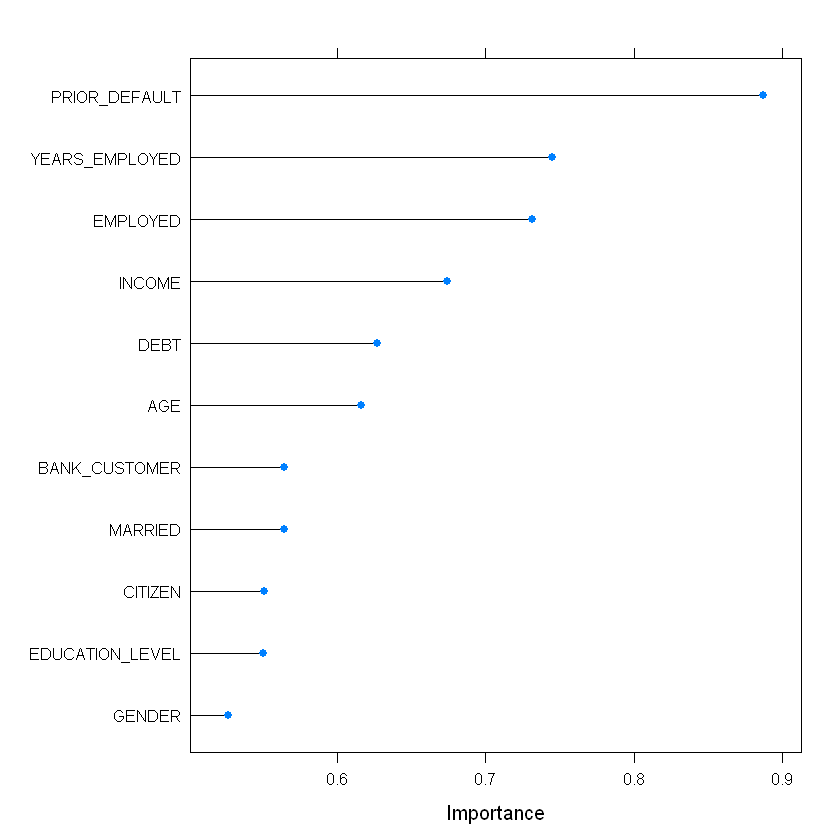

In [12]:
imp <- varImp(model, useModel=FALSE, scale=FALSE)
imp
plot(imp)